uses https://github.com/yt-project/yt/pull/4497 to interpolate data onto regular cartesian grid

In [1]:
import yt.testing

ds = yt.testing.fake_amr_ds(geometry="spherical")

yt : [INFO     ] 2023-06-13 11:38:10,058 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-13 11:38:10,060 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2023-06-13 11:38:10,061 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-13 11:38:10,063 Parameters: domain_right_edge         = [1.         3.14159265 6.28318531]
yt : [INFO     ] 2023-06-13 11:38:10,064 Parameters: cosmological_simulation   = 0


extract some data

In [2]:
ad = ds.all_data()
x = ad[('index', 'cartesian_x')]
y = ad[('index', 'cartesian_y')]
z = ad[('index', 'cartesian_z')]
r = ad[('index', 'r')]
theta = ad[('index', 'theta')]
phi = ad[('index', 'phi')]

build an interpolator 

In [3]:
from scipy.interpolate import griddata
import numpy as np 

# the grid to interpolate onto
x_i1d = np.linspace(-1, 1, 50)
y_i1d = np.linspace(-1, 1, 50)
z_i1d = np.linspace(-1, 1, 50)
x_i, y_i, z_i = np.meshgrid(x_i1d, y_i1d, z_i1d, indexing='ij')
real_grid_r = np.sqrt(x_i**2+ y_i**2 + z_i**2) # useful for later

def move_to_grid(griv_var):
    gridded_val = griddata((x.ravel(), y.ravel(), z.ravel()), griv_var.ravel(), (x_i, y_i, z_i), method='nearest')
    # nearest method will not apply any distance cutoff, so lets do that ourselves
    gridded_val[real_grid_r>1] = np.nan
    return gridded_val

Text(0.5, 1.0, 'r(x = 0ish)')

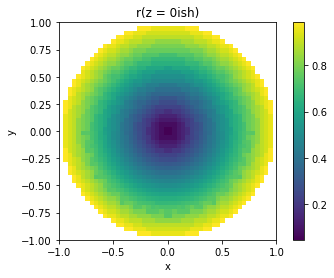

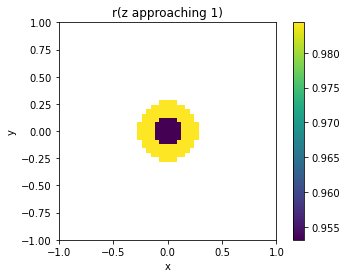

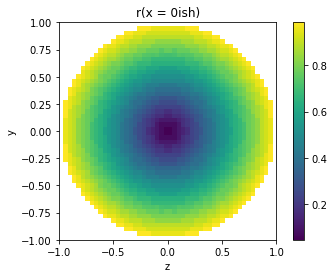

In [4]:
import matplotlib.pyplot as plt 

gridded_r = move_to_grid(r)

plt.figure()
plt.imshow(gridded_r[:,:,25], extent=((-1, 1, -1, 1)), origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('r(z = 0ish)')

plt.figure()
plt.imshow(gridded_r[:,:,48], extent=((-1, 1, -1, 1)), origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('r(z approaching 1)')

plt.figure()
plt.imshow(gridded_r[25,:,:], extent=((-1, 1, -1, 1)), origin='lower')
plt.colorbar()
plt.xlabel('z')
plt.ylabel('y')
plt.title('r(x = 0ish)')

Text(0.5, 1.0, 'phi(z approaching 1)')

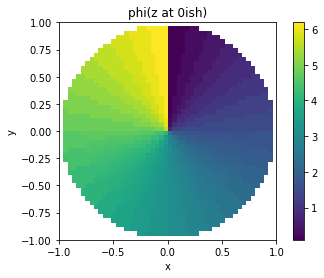

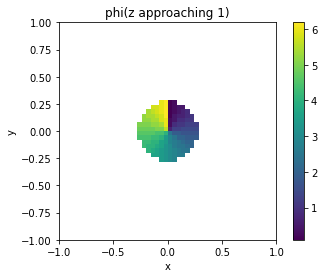

In [5]:
gridded_phi = move_to_grid(phi)
plt.imshow(gridded_phi[:,:,25], extent=((-1, 1, -1, 1)), origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title("phi(z at 0ish)")


plt.figure()
plt.imshow(gridded_phi[:,:,48], extent=((-1, 1, -1, 1)), origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('phi(z approaching 1)')

Text(0.5, 1.0, 'theta(x at closer to 1ish)')

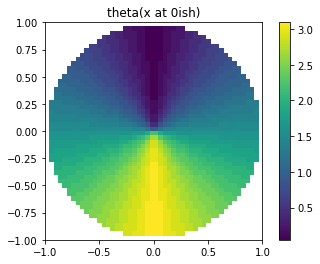

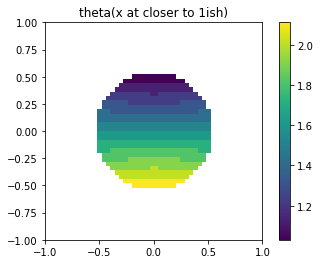

In [7]:
gridded_theta = move_to_grid(theta)

plt.imshow(gridded_theta[25,:,:].transpose(), origin='lower', extent=(-1,1,-1,1))  # transpose so that we have z on image y axis
plt.colorbar()
plt.title('theta(x at 0ish)')

plt.figure()
plt.imshow(gridded_theta[45,:,:].transpose(), origin='lower', extent=(-1,1,-1,1))  # transpose so that we have z on image y axis
plt.colorbar()
plt.title('theta(x at closer to 1ish)')